In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from keras.initializers import RandomNormal
# from keras.layers import Conv1D, MaxPooling2D
import warnings
import pickle
warnings.filterwarnings("ignore")

Using TensorFlow backend.


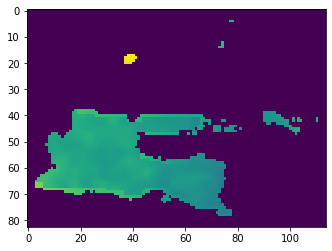

In [2]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [3]:
X

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [4]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
# data tahun 1983-2011
df=df[:-60]

In [5]:
# train -> data 1983-2011
train, test = df, df[-24:]

In [6]:
np.array(train).shape[0]/12

28.0

In [7]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
scaler.fit(test)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)

In [8]:
n_input = 12
n_features = 9462
batch_size=12
# supervised data
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(20, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(30, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(40, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 10)            378920    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                630       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0

In [11]:
model.fit_generator(generator,epochs=108)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/108
27/27 [==============================] - 1s 54ms/step - loss: 0.4171 - mean_absolute_error: 0.4171
Epoch 2/108
27/27 [==============================] - 1s 27ms/step - loss: 0.2537 - mean_absolute_error: 0.2537
Epoch 3/108
27/27 [==============================] - 1s 27ms/step - loss: 0.1265 - mean_absolute_error: 0.1265
Epoch 4/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0834 - mean_absolute_error: 0.0834
Epoch 5/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675
Epoch 6/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595
Epoch 7/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553
Epoch 8/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522
Epoch 9/108
27/27 [=================

27/27 [==============================] - 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 72/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 73/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 74/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 75/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 76/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 77/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 78/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 79/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch

In [12]:
model.evaluate_generator(validation_sequence)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.04396912083029747, 0.04396912]

In [13]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [14]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

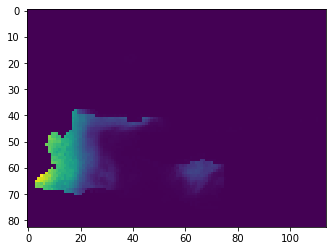

In [15]:
plt.imshow(pred_list[0].reshape(83,114))

In [16]:
train = df
test = df[-24:]

In [17]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [18]:
n_input = 12
n_features = 9462
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [19]:
model.fit_generator(generator,epochs=108)

Epoch 1/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 2/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 3/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 4/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 5/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 6/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 7/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 8/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 9/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
E

27/27 [==============================] - 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 75/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 76/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 77/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 78/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 79/108
27/27 [==============================] - 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 80/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 81/108
27/27 [==============================] - 1s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 82/108
27/27 [==============================] - 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch

In [20]:
model.evaluate_generator(validation_sequence)

[0.04399169981479645, 0.0439917]

In [21]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [22]:
batch

array([[[2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
         2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
        [2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
         2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
        [2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
         2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
        ...,
        [3.81504105e-05, 3.74271040e-05, 3.90811292e-05, ...,
         4.03752092e-05, 3.84161176e-05, 3.96714895e-05],
        [3.76367352e-05, 3.69228801e-05, 3.85583771e-05, ...,
         3.98355296e-05, 3.79010671e-05, 3.91409521e-05],
        [3.52542338e-05, 3.45837252e-05, 3.61319726e-05, ...,
         3.73311050e-05, 3.55107077e-05, 3.66791137e-05]]])

In [23]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
        2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
       [2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
        2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
       [2.64613809e-05, 2.59517874e-05, 2.71586650e-05, ...,
        2.80701206e-05, 2.66614625e-05, 2.75730054e-05],
       ...,
       [2.53341459e-05, 2.48571159e-05, 2.60307806e-05, ...,
        2.68960230e-05, 2.55514988e-05, 2.64248902e-05],
       [2.55963732e-05, 2.51101901e-05, 2.62926187e-05, ...,
        2.71688714e-05, 2.58092805e-05, 2.66911247e-05],
       [2.64530281e-05, 2.59434964e-05, 2.71502759e-05, ...,
        2.80613694e-05, 2.66531770e-05, 2.75643815e-05]])

In [24]:
pred_list.shape

(60, 9462)

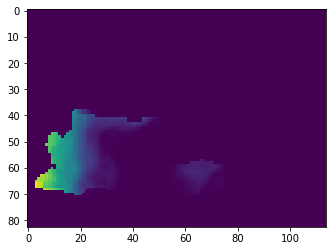

In [25]:
plt.imshow(pred_list[0].reshape(83,114))

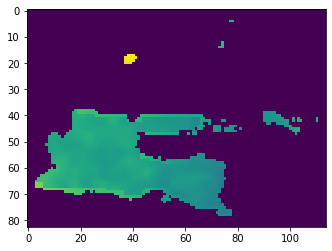

In [26]:
df_asli = data_1
plt.imshow(df_asli[0].reshape(83,114))

In [27]:
max(pred_list[10])

0.10363658433132006

In [28]:
max(df_asli[10])

0.017539296

In [29]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
for pred1 in pred_list:
    mae_ = df_asli[no]-pred1
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

In [30]:
mae

[0.20161117900189593,
 0.19562961022173186,
 0.13328773791431364,
 0.029937997148137715,
 -0.002333465001732725,
 0.011206226648371074,
 0.005409059342509637,
 0.015513794657915806,
 0.31047264982721884,
 0.019890053765076837,
 -0.002626513269798273,
 0.03703980267614064,
 0.0779604364303491,
 0.11469579002837114,
 0.10067692140373478,
 0.02663376248996669,
 -0.002333465001732725,
 0.005516931728012071,
 0.01806461641788579,
 0.008180228185765054,
 0.18230213738696685,
 0.008867513955719199,
 -0.0025625614771987476,
 0.01687844285793571,
 0.056976622110124865,
 0.05067279633282117,
 0.06277999777108934,
 0.008128583403799083,
 -0.002333465001732725,
 0.005023201718448268,
 0.008369414778816106,
 0.022273878878635935,
 0.07277572500619342,
 0.007873047838620225,
 -0.002231782242997842,
 -0.002579387573495918,
 0.060407341862859995,
 0.022653769296831206,
 0.017594419735143,
 -0.002333465001732725,
 -0.002333465001732725,
 -0.002333465001732725,
 -0.0019977732898922864,
 0.00718875014729

In [31]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))


In [32]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [33]:
Pred_rata

[0.0023644688623984307,
 0.0023644688623984307,
 0.0023644688623984307,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.002340131287692606,
 0.0023644688623984307,
 0.002642227280514663,
 0.0026313178391879247,
 0.002579387573495918,
 0.0023470324801715737,
 0.002347224048019389,
 0.0023644688623984307,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465244449986,
 0.0023644688623984307,
 0.0026421758185314463,
 0.0026313018542423188,
 0.002579392040628175,
 0.0023621270725000514,
 0.0023606387644449453,
 0.0023644688623984307,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.0023336016158167034,
 0.0023644688623984307,
 0.002656696562808913,
 0.0026313178391879247,
 0.002579387573495918,
 0.0023491464703046883,
 0.002354899309046478,
 0.0023644687576419234,
 0.002333465001732725,
 0.002333465001732725,
 0.002333465001732725,
 0.0023334650017

In [34]:
df_asli_rata


[0.20397566,
 0.19799407,
 0.13565221,
 0.032271463,
 0.0,
 0.013539691,
 0.007742524,
 0.017853927,
 0.3128371,
 0.02253228,
 4.8045695e-06,
 0.03961919,
 0.080307476,
 0.11704302,
 0.1030414,
 0.028967226,
 0.0,
 0.007850396,
 0.020398082,
 0.010513693,
 0.1846666,
 0.0115096895,
 6.874037e-05,
 0.019457834,
 0.059338752,
 0.053033434,
 0.065144464,
 0.010462048,
 0.0,
 0.0073566665,
 0.010702879,
 0.024607481,
 0.07514019,
 0.010529744,
 0.00039953558,
 0.0,
 0.062756486,
 0.02500867,
 0.019958887,
 0.0,
 0.0,
 0.0,
 0.00033569173,
 0.009522216,
 0.009292673,
 0.0016805856,
 0.0002217452,
 1.3502024e-05,
 0.17696069,
 0.18594149,
 0.19720568,
 0.040911835,
 0.0,
 0.022085713,
 0.03119794,
 0.045924917,
 0.2649516,
 0.028108876,
 0.00019953931,
 5.2411167e-05]

In [35]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [36]:
len(add_dates)


60

In [37]:
len(Pred_rata)


60

In [38]:
len(df_asli_rata)

60

In [39]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [40]:
df

,bulan,data
0,2012-01-01,0.201611
1,2012-02-01,0.195630
2,2012-03-01,0.133288
3,2012-04-01,0.029938
4,2012-05-01,-0.002333
5,2012-06-01,0.011206
6,2012-07-01,0.005409
7,2012-08-01,0.015514
8,2012-09-01,0.310473
9,2012-10-01,0.019890


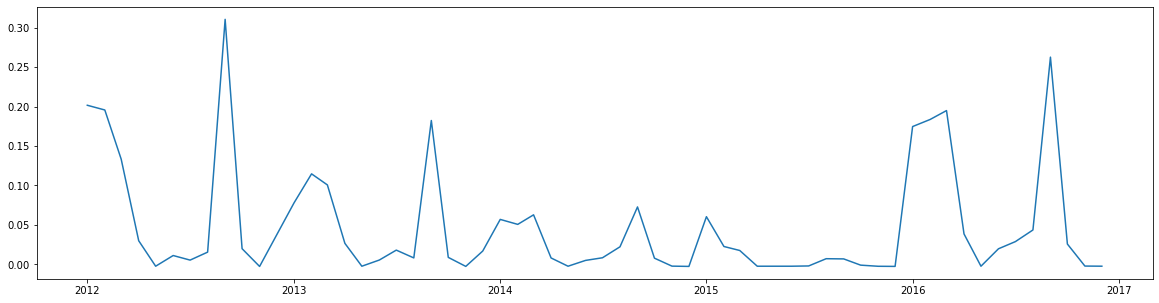

In [41]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [42]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.002364,0.203976
1,2012-02-01,0.002364,0.197994
2,2012-03-01,0.002364,0.135652
3,2012-04-01,0.002333,0.032271
4,2012-05-01,0.002333,0.000000
5,2012-06-01,0.002333,0.013540
6,2012-07-01,0.002333,0.007743
7,2012-08-01,0.002340,0.017854
8,2012-09-01,0.002364,0.312837
9,2012-10-01,0.002642,0.022532


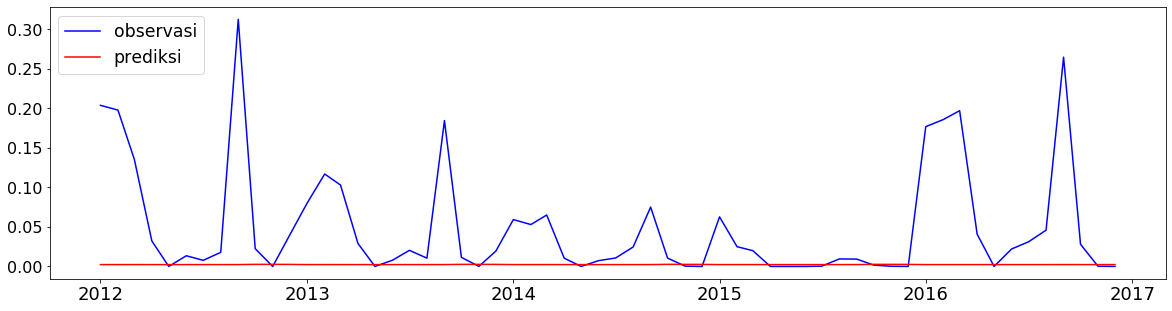

In [43]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

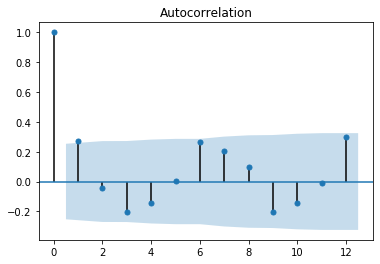

In [44]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

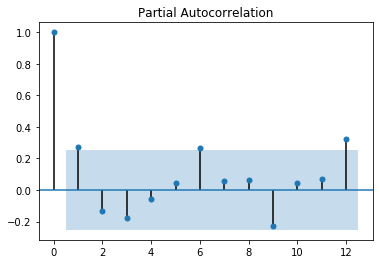

In [45]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

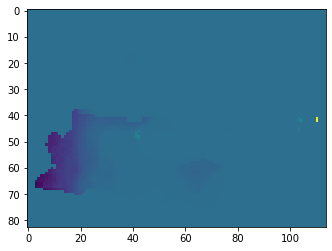

In [46]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [47]:
sum(mae)/60

0.04771570046818939

In [48]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [49]:
pred_list[pred_list==0]=-9999

In [50]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_3/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_3/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_3/201612.tif'

In [51]:
model.save('LSTM1020DENSE3040_adam_seed1.h5')